In [20]:

# https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
    
import sys
import math

# !{sys.executable} -m pip install --upgrade pip

try:
    import numpy as np
except ModuleNotFoundError:
    !{sys.executable} -m pip install numpy
    import numpy as np
    

try:
    import pandas as pd
except ModuleNotFoundError:
    !{sys.executable} -m pip install pandas
    import pandas as pd

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt

    
try:
    import scipy
    import scipy.io
except ModuleNotFoundError:
    !{sys.executable} -m pip install scipy
    import scipy

        
try:
    import sklearn
except ModuleNotFoundError:
    !{sys.executable} -m pip install sklearn
    import sklearn

try:
    import mat4py
except ModuleNotFoundError:
    !{sys.executable} -m pip install mat4py
    import mat4py


In [21]:

"""
Make plot outputs appear and be stored within the notebook
"""
%matplotlib inline

"""
fix random seed for reproducibility
"""
np.random.seed(7)

In [22]:
X = pd.read_csv("dataset_PTO.csv", header=None)
y = pd.read_csv("Category_PTO.csv", header=None)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [23]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,0.063963,0.056908,0.053889,0.055524,0.057464,0.057859,0.059240,0.065306,0.073226,0.073798,...,-0.059746,-0.059725,-0.060667,-0.059253,-0.056810,-0.055070,-0.055006,-0.055238,-0.054218,-0.049502
std,0.294759,0.286581,0.277943,0.275550,0.275531,0.277611,0.282928,0.291731,0.303978,0.308091,...,0.276072,0.264782,0.256070,0.253114,0.254115,0.254753,0.254494,0.254274,0.252486,0.252419
min,-0.647026,-0.629796,-0.651695,-0.673195,-0.682151,-0.720117,-0.747012,-0.804546,-0.771112,-0.704589,...,-0.828068,-0.896372,-0.908307,-0.846942,-0.846552,-0.930843,-0.977432,-0.859172,-0.794393,-0.876424
25%,-0.139461,-0.145568,-0.140737,-0.131860,-0.134318,-0.128615,-0.136554,-0.132181,-0.140172,-0.140589,...,-0.239440,-0.235329,-0.236006,-0.236278,-0.233400,-0.226079,-0.218294,-0.225185,-0.223508,-0.221942
50%,0.040074,0.021308,0.022964,0.026278,0.040713,0.042731,0.034605,0.039706,0.050061,0.043344,...,-0.062696,-0.050247,-0.044566,-0.043597,-0.035770,-0.036927,-0.045414,-0.051916,-0.056213,-0.049180
75%,0.258066,0.243463,0.237816,0.239760,0.221747,0.230467,0.240225,0.253544,0.274579,0.292765,...,0.128624,0.117212,0.117042,0.114130,0.116837,0.111441,0.122912,0.124498,0.114833,0.122787
max,1.063588,1.086669,1.135319,1.314185,1.299864,1.098930,1.017583,1.029174,1.003328,1.228888,...,0.805257,0.742064,0.701187,0.714645,0.602742,0.610016,0.685765,0.753969,0.771754,0.748980


In [24]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y_pred = svclassifier.predict(X_test)  

Text(0.5,1,'2-class Precision-Recall curve')

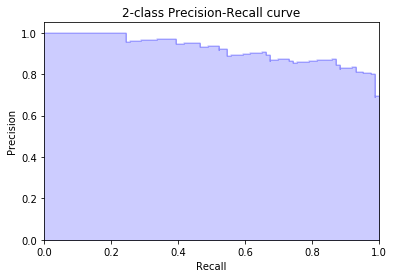

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.utils.fixes import signature

y_score = svclassifier.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
plt.title('2-class Precision-Recall curve')

In [27]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.93      0.81      0.87       100
        1.0       0.81      0.93      0.86        86

avg / total       0.87      0.87      0.87       186



In [28]:
mse = mean_squared_error(y_test,y_pred)
print('Test MSE: %.2f' % (mse))

Test MSE: 0.13
